# Pandas Plots

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plt is the alias for pyplot

In [4]:
df = pd.read_csv("Top 100 most Streamed - Sheet9.csv")

In [6]:
df.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [13]:
df.isnull().sum()

title               0
artist              0
top genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64

In [15]:
df.shape

(100, 14)

In [17]:
df.dtypes

title               object
artist              object
top genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

In [19]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [21]:
df.dtypes.value_counts()

int64     11
object     3
Name: count, dtype: int64

# Pandas Plots

#### Q) Plot artist  wise mean of energy and liveness on a bar chart for the artist who have 3 or more songs

In [25]:
r1 = df['artist'].value_counts()
df_more3 = r1[r1>=3]
df_more3

artist
Post Malone         7
Ed Sheeran          5
The Weeknd          4
Imagine Dragons     4
Shawn Mendes        3
Billie Eilish       3
Maroon 5            3
The Chainsmokers    3
Justin Bieber       3
Name: count, dtype: int64

In [31]:
print(type(df_more3))

<class 'pandas.core.series.Series'>


In [33]:
morethan3 = df_more3.index
morethan3

Index(['Post Malone', 'Ed Sheeran', 'The Weeknd', 'Imagine Dragons',
       'Shawn Mendes', 'Billie Eilish', 'Maroon 5', 'The Chainsmokers',
       'Justin Bieber'],
      dtype='object', name='artist')

In [40]:
# df[df.year.isin(years)]
res1 = df[df['artist'].isin(morethan3)].groupby('artist')[['energy','liveness']].mean()
res1

,energy,liveness
artist,,
Billie Eilish,28.000000,9.666667
Ed Sheeran,52.200000,11.400000
Imagine Dragons,77.250000,29.250000
Justin Bieber,57.000000,22.000000
Maroon 5,55.333333,10.000000
Post Malone,60.571429,14.142857
Shawn Mendes,70.333333,8.333333
The Chainsmokers,67.666667,13.666667
The Weeknd,66.250000,12.000000


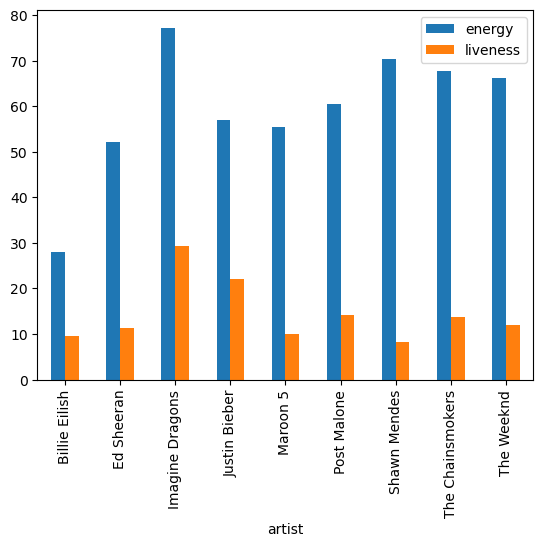

In [42]:
res1.plot(kind='bar')
plt.show()

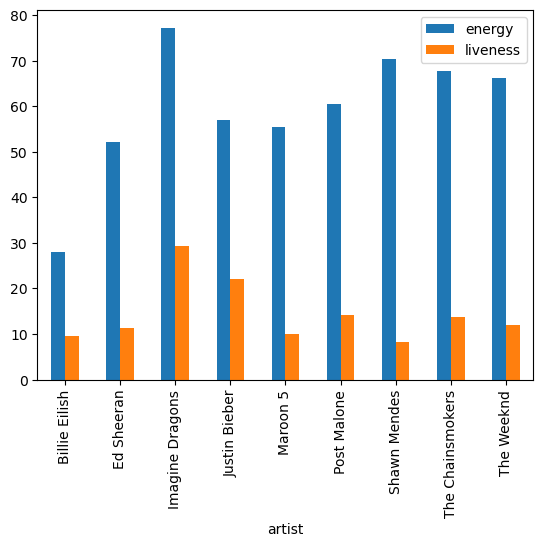

In [44]:
res1.plot.bar()
plt.show()

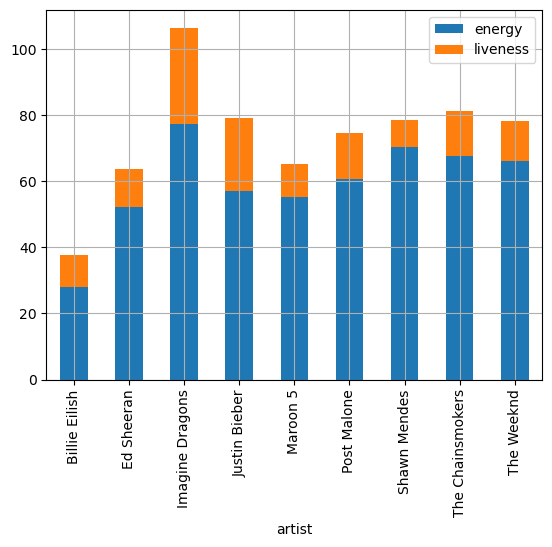

In [48]:
res1.plot.bar(stacked = True)
plt.grid()
plt.show()

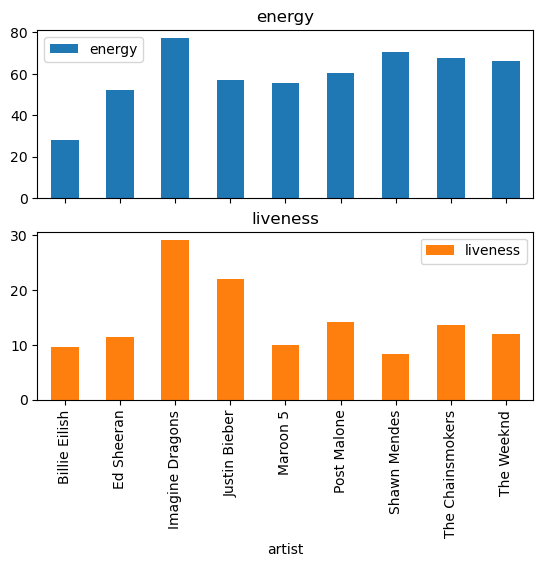

In [50]:
res1.plot.bar(subplots = True)
plt.show()

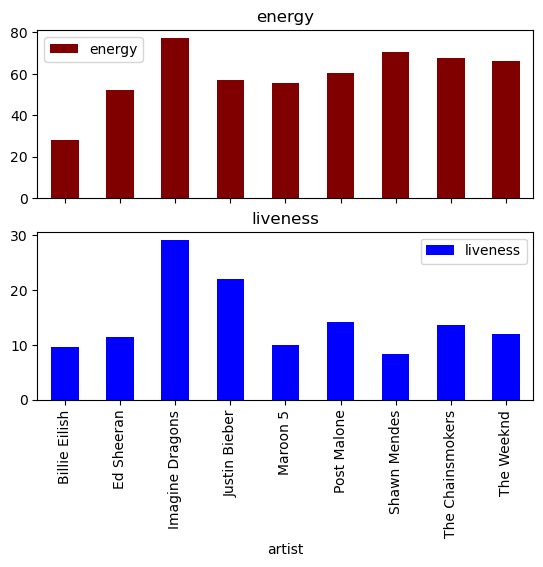

In [52]:
res1.plot.bar(subplots = True, color = {"energy":"maroon","liveness":"blue"})
plt.show()

#### Q) Plot genre wise mean of danceability and variance on a line chart for the artist who have 3 or more songs.

In [54]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [57]:
r2 = df.groupby('top genre')[['danceability','valance']].mean()
r2 = r2.sort_values(by = 'danceability', ascending = False).head()
r2

,danceability,valance
top genre,,
conscious hip hop,91.0,42.0
lgbtq+ hip hop,88.0,64.0
rap,83.5,44.0
australian pop,82.0,51.0
emo rap,80.5,45.5


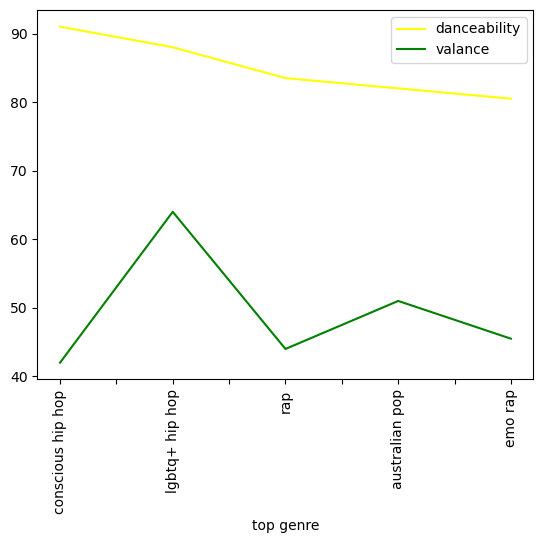

In [59]:
r2.plot.line(rot = 90, color = ['yellow','green'])
plt.show()

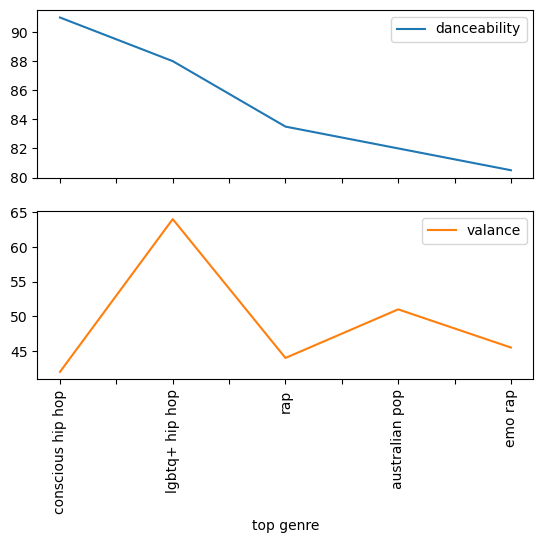

In [63]:
r2.plot(kind= 'line', subplots = True, rot = 90)
plt.show()

#### Q) Plot year wise mean of popularity on a pie chart for the years 2017 and above

In [70]:
df.columns

Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [66]:
df_year2017 = df[df['year']>=2017]
df_year2017.shape

(54, 14)

In [74]:
r3 = df_year2017.groupby('year')['popularity'].mean()
print(type(r3))
r3

<class 'pandas.core.series.Series'>


year
2017    82.333333
2018    79.500000
2019    80.812500
2020    85.333333
2021    79.666667
Name: popularity, dtype: float64

In [80]:
r3_sum = r3.values.sum()
print(r3_sum)
per2018 = (79.500000*100/r3_sum)
print(per2018)

407.6458333333333
19.50222313078142


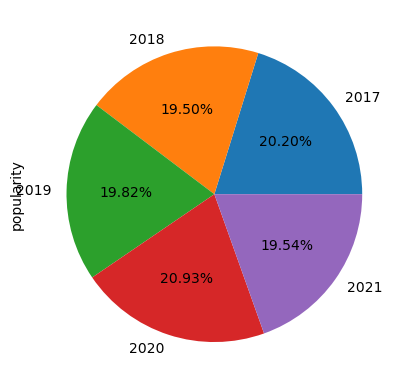

In [76]:
# autopct = auto percentage
r3.plot(kind='pie', autopct = '%.2f%%')
plt.show()

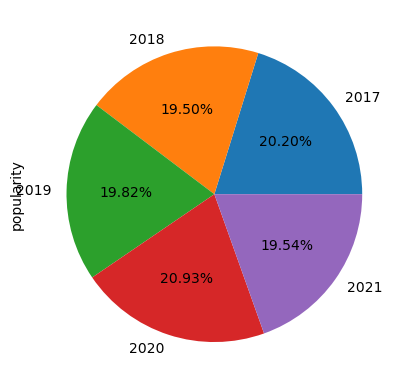

In [82]:
r3.plot.pie( autopct = '%.2f%%')
plt.show()

#### Q) Plot a pie chart for the mean pf popularity and energy for based on the year for the year 2017 and beyond

In [87]:
df_year2017.shape

(54, 14)

In [85]:
r4 = df_year2017.groupby('year')[['popularity','energy']].mean()
r4

,popularity,energy
year,,
2017,82.333333,64.666667
2018,79.500000,60.400000
2019,80.812500,58.437500
2020,85.333333,73.666667
2021,79.666667,62.666667


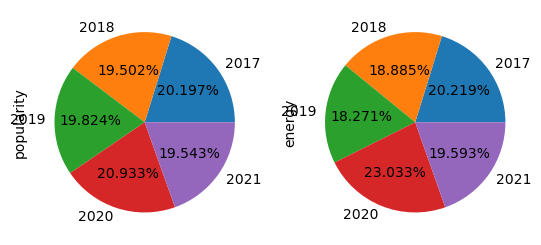

In [91]:
r4.plot.pie(autopct = '%.3f%%', subplots =  True, legend = False)
plt.show()

#### Q) Plot mean of energy and danceability based on different year on a scatter plot

In [109]:
r5 = df.groupby('year')[['energy','danceability']].mean()
r5

,energy,danceability
year,,
1975,40.000000,41.000000
1995,90.000000,38.000000
2004,91.000000,35.000000
2008,46.000000,69.000000
2012,80.333333,53.333333
2013,57.250000,51.500000
2014,56.333333,59.166667
2015,65.076923,71.384615
2016,63.687500,67.750000


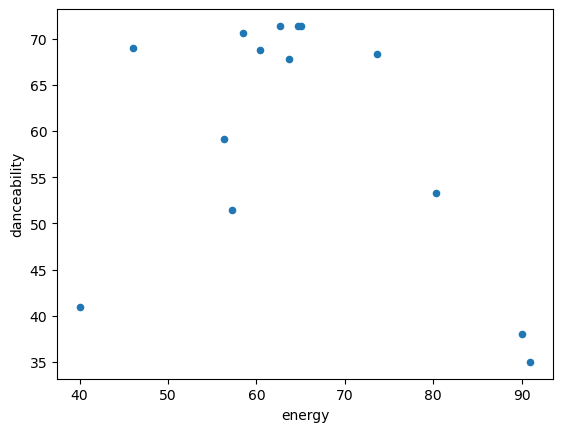

In [111]:
r5.plot(x='energy', y='danceability',kind='scatter')
plt.show()

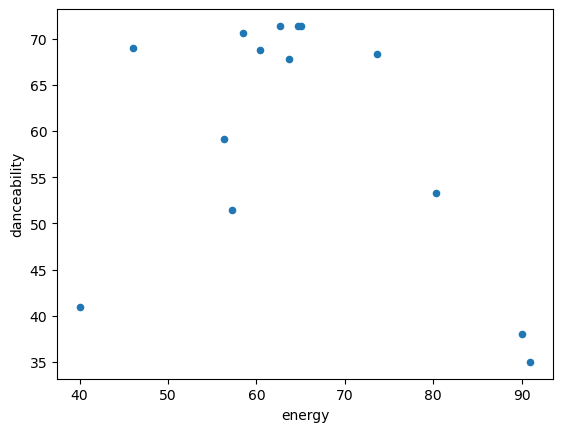

In [113]:
r5.plot.scatter(x='energy', y ='danceability')
plt.show()